# **Création de la Database Argent**

## **Imports et Dataframes**

### **Imports et création de la database**

In [71]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import text

from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, StandardScaler, RobustScaler, FunctionTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

from scipy.spatial.distance import cdist

from kmodes.kprototypes import KPrototypes

import os

In [72]:
base = declarative_base()

engine = create_engine("sqlite:///db/db_argent.sqlite", echo=False)

/tmp/ipykernel_89793/1555228871.py:1: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  base = declarative_base()


In [73]:
list_data = []

with engine.connect() as connection:
    result = connection.execute(text("""
    select *
    from "Argent"
    """))
    
    for row in result:
        list_data.append(row)

data = pd.DataFrame(list_data)

In [74]:
# profile = ProfileReport(data, title="Pandas Profiling Report")
# profile.to_widgets()
# profile.to_notebook_iframe()

In [75]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 200

In [76]:
df = data.copy()
# df.set_index('customer_unique_id', inplace=True)

df.head(20)

,customer_unique_id,payment_sequential,payment_type,product_category_name_english,order_status,customer_zip_code_prefix,customer_city,customer_state,shipping_limit_date,review_creation_date,review_answer_timestamp,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,response_time,price,freight_value,payment_value,payment_installments,review_score,price_total,total_order,rfm,nb_char_comment
0,0000366f3b9a7992bf8c76cfdf3221e2,1,credit_card,Home,delivered,7787,cajamar,SP,1526382678000000000,1526515200000000000,1526910288000000000,1525949787000000000,1525950678000000000,1526113080000000000,1526503717000000000,1526860800000000000,395088000000000,129.90,12.00,141.90,8.0,5.0,129.90,1.0,16.0,126
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,credit_card,Health_Beauty,delivered,6053,osasco,SP,1526061393000000000,1525996800000000000,1526077765000000000,1525691487000000000,1525717544000000000,1525868280000000000,1525975362000000000,1526342400000000000,80965000000000,18.90,8.29,27.19,1.0,4.0,18.90,1.0,13.0,0
2,0000f46a3911fa3c0805444483337064,1,credit_card,Office_Supplies,delivered,88115,sao jose,SC,1489611903000000000,1491436800000000000,1491527984000000000,1489179903000000000,1489179903000000000,1489409910000000000,1491403127000000000,1491523200000000000,91184000000000,69.00,17.22,86.22,8.0,3.0,69.00,1.0,1.0,0
3,0000f6ccb0745a6a4b88665a16c9f078,1,credit_card,Technology,delivered,66812,belem,PA,1508363357000000000,1509580800000000000,1509668271000000000,1507840181000000000,1507841357000000000,1507925299000000000,1509571385000000000,1510531200000000000,87471000000000,25.99,17.63,43.62,4.0,4.0,25.99,1.0,7.0,12
4,0004aac84e0df4da2b147fca70cf8255,1,credit_card,Technology,delivered,18040,sorocaba,SP,1511381212000000000,1511827200000000000,1512253775000000000,1510688742000000000,1510690012000000000,1510861930000000000,1511824136000000000,1512432000000000000,426575000000000,180.00,16.89,196.89,6.0,5.0,180.00,1.0,10.0,0
5,0004bd2a26a76fe21f786e4fbd80607f,1,credit_card,Construction_Tools,delivered,5036,sao paulo,SP,1523476139000000000,1523145600000000000,1523391212000000000,1522956796000000000,1522957739000000000,1523061532000000000,1523117563000000000,1524096000000000000,245612000000000,154.00,12.98,166.98,8.0,4.0,154.00,1.0,16.0,0
6,00050ab1314c0e55a6ca13cf7181fecf,1,boleto,Technology,delivered,13084,campinas,SP,1525233073000000000,1524873600000000000,1525207311000000000,1524229043000000000,1524628273000000000,1524669900000000000,1524830939000000000,1525824000000000000,333711000000000,27.99,7.39,35.38,1.0,4.0,27.99,1.0,14.0,0
7,00053a61a98854899e70ed204dd4bafe,1,credit_card,Sports_Leisure,delivered,80410,curitiba,PR,1520335857000000000,1521244800000000000,1521328973000000000,1519816541000000000,1519817562000000000,1519934970000000000,1521226971000000000,1522022400000000000,84173000000000,191.00,18.59,419.18,3.0,1.0,382.00,2.0,16.0,396
8,0005e1862207bf6ccc02e4228effd9a0,1,credit_card,Fashion_Accessories,delivered,25966,teresopolis,RJ,1489103006000000000,1489104000000000000,1489635959000000000,1488670332000000000,1488671006000000000,1488777247000000000,1489048388000000000,1491436800000000000,531959000000000,135.00,15.12,150.12,3.0,4.0,135.00,1.0,3.0,0
9,0005ef4cd20d2893f0d9fbd94d3c0d97,1,credit_card,Sports_Leisure,delivered,65060,sao luis,MA,1521214726000000000,1522972800000000000,1523048062000000000,1520868132000000000,1520869126000000000,1520957247000000000,1525523918000000000,1522800000000000000,75262000000000,104.90,24.86,129.76,4.0,1.0,104.90,1.0,15.0,122


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93394 entries, 0 to 93393
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_unique_id             93394 non-null  object 
 1   payment_sequential             93394 non-null  int64  
 2   payment_type                   93394 non-null  object 
 3   product_category_name_english  93394 non-null  object 
 4   order_status                   93394 non-null  object 
 5   customer_zip_code_prefix       93394 non-null  int64  
 6   customer_city                  93394 non-null  object 
 7   customer_state                 93394 non-null  object 
 8   shipping_limit_date            93394 non-null  int64  
 9   review_creation_date           93394 non-null  int64  
 10  review_answer_timestamp        93394 non-null  int64  
 11  order_purchase_timestamp       93394 non-null  int64  
 12  order_approved_at              93394 non-null 

### **Variables catégorielles**

In [78]:
for col in df.select_dtypes('object').columns:
    print(f"\nColonne : {col}\n{df[col].value_counts()}\n")


Colonne : customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
aa5e42c2b46e0b5627ce9ff549799da9    1
aa5dd0967deea4691b54a5091db2206a    1
aa5dd0414c0e9ad24f22e06bec1dc805    1
aa5d6d18f850e370ea0c876268d71d68    1
                                   ..
55133cf96f44c834ac51d0e3b678c7a8    1
5511558799e00a6828ae95c9bd9aec98    1
5510d1cb4dd50789f97bcb2a57bc8380    1
55106b6ebf9f870a3a359a00d5f26d1c    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: customer_unique_id, Length: 93394, dtype: int64


Colonne : payment_type
credit_card    71525
boleto         18699
voucher         1742
debit_card      1428
Name: payment_type, dtype: int64


Colonne : product_category_name_english
Home                      22828
Technology                13297
Health_Beauty             11576
Fashion_Accessories        8724
Toys_Games                 8128
Sports_Leisure             7266
Construction_Tools         5097
Automotive                 3804
Office_Supplies            3427
Baby                      

In [79]:
df_cat = df[df.select_dtypes('object').columns]

df_cat.head(10)

,customer_unique_id,payment_type,product_category_name_english,order_status,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,credit_card,Home,delivered,cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,credit_card,Health_Beauty,delivered,osasco,SP
2,0000f46a3911fa3c0805444483337064,credit_card,Office_Supplies,delivered,sao jose,SC
3,0000f6ccb0745a6a4b88665a16c9f078,credit_card,Technology,delivered,belem,PA
4,0004aac84e0df4da2b147fca70cf8255,credit_card,Technology,delivered,sorocaba,SP
5,0004bd2a26a76fe21f786e4fbd80607f,credit_card,Construction_Tools,delivered,sao paulo,SP
6,00050ab1314c0e55a6ca13cf7181fecf,boleto,Technology,delivered,campinas,SP
7,00053a61a98854899e70ed204dd4bafe,credit_card,Sports_Leisure,delivered,curitiba,PR
8,0005e1862207bf6ccc02e4228effd9a0,credit_card,Fashion_Accessories,delivered,teresopolis,RJ
9,0005ef4cd20d2893f0d9fbd94d3c0d97,credit_card,Sports_Leisure,delivered,sao luis,MA


<Figure size 640x480 with 0 Axes>

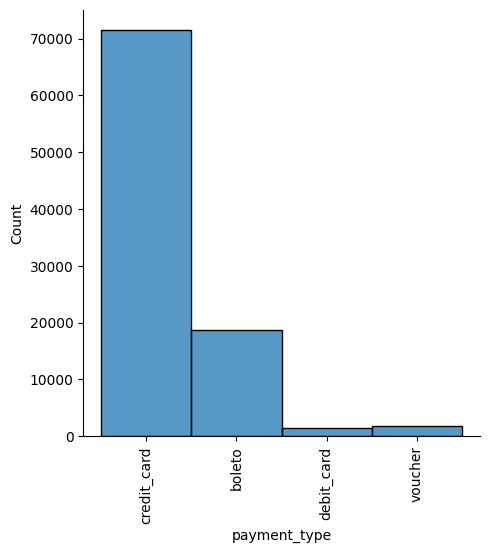

<Figure size 640x480 with 0 Axes>

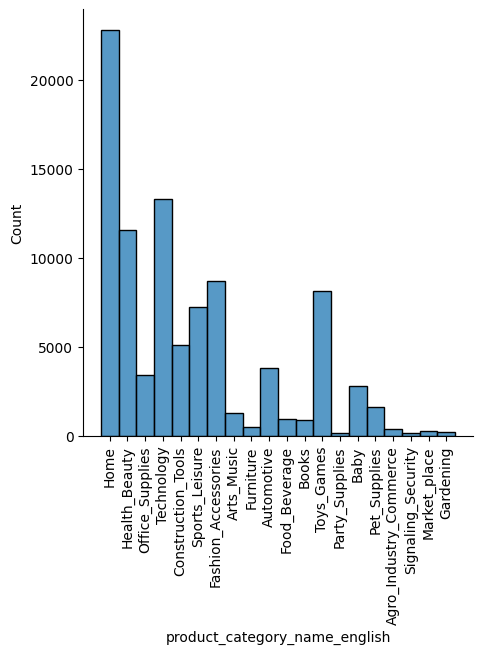

<Figure size 640x480 with 0 Axes>

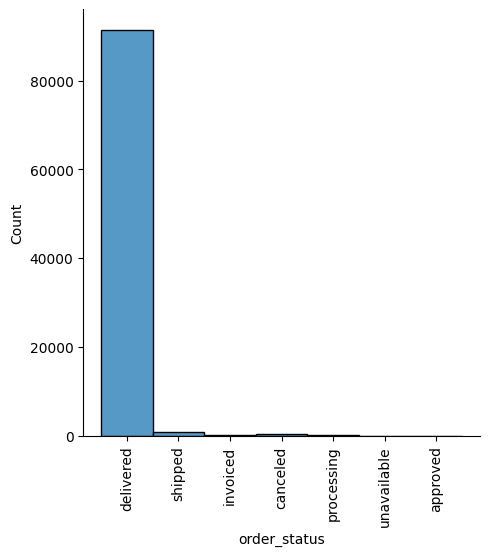

<Figure size 640x480 with 0 Axes>

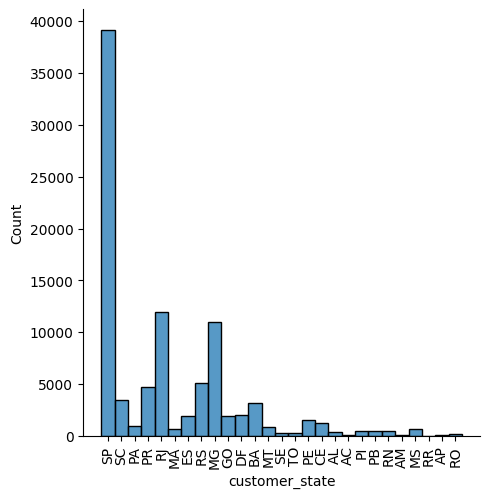

In [80]:
for col in df_cat.drop(['customer_unique_id', 'customer_city'], axis=1).columns:
    plt.figure()
    sns.displot(df_cat[col])
    plt.xticks(rotation=90)
    plt.savefig(f"graphiques/displot_{col}.png")
    plt.show()

### **Nettoyage**

In [81]:
df

,customer_unique_id,payment_sequential,payment_type,product_category_name_english,order_status,customer_zip_code_prefix,customer_city,customer_state,shipping_limit_date,review_creation_date,review_answer_timestamp,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,response_time,price,freight_value,payment_value,payment_installments,review_score,price_total,total_order,rfm,nb_char_comment
0,0000366f3b9a7992bf8c76cfdf3221e2,1,credit_card,Home,delivered,7787,cajamar,SP,1526382678000000000,1526515200000000000,1526910288000000000,1525949787000000000,1525950678000000000,1526113080000000000,1526503717000000000,1526860800000000000,395088000000000,129.90,12.00,141.90,8.0,5.0,129.90,1.0,16.0,126
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,credit_card,Health_Beauty,delivered,6053,osasco,SP,1526061393000000000,1525996800000000000,1526077765000000000,1525691487000000000,1525717544000000000,1525868280000000000,1525975362000000000,1526342400000000000,80965000000000,18.90,8.29,27.19,1.0,4.0,18.90,1.0,13.0,0
2,0000f46a3911fa3c0805444483337064,1,credit_card,Office_Supplies,delivered,88115,sao jose,SC,1489611903000000000,1491436800000000000,1491527984000000000,1489179903000000000,1489179903000000000,1489409910000000000,1491403127000000000,1491523200000000000,91184000000000,69.00,17.22,86.22,8.0,3.0,69.00,1.0,1.0,0
3,0000f6ccb0745a6a4b88665a16c9f078,1,credit_card,Technology,delivered,66812,belem,PA,1508363357000000000,1509580800000000000,1509668271000000000,1507840181000000000,1507841357000000000,1507925299000000000,1509571385000000000,1510531200000000000,87471000000000,25.99,17.63,43.62,4.0,4.0,25.99,1.0,7.0,12
4,0004aac84e0df4da2b147fca70cf8255,1,credit_card,Technology,delivered,18040,sorocaba,SP,1511381212000000000,1511827200000000000,1512253775000000000,1510688742000000000,1510690012000000000,1510861930000000000,1511824136000000000,1512432000000000000,426575000000000,180.00,16.89,196.89,6.0,5.0,180.00,1.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93389,fffcf5a5ff07b0908bd4e2dbc735a684,1,credit_card,Health_Beauty,delivered,55250,sanharo,PE,1498425316000000000,1499385600000000000,1499772005000000000,1496955636000000000,1496956516000000000,1498223007000000000,1499332920000000000,1501632000000000000,386405000000000,785.00,248.71,2067.42,10.0,5.0,1570.00,2.0,10.0,0
93390,fffea47cd6d3cc0a88bd621562a9d061,1,credit_card,Baby,delivered,44054,feira de santana,BA,1513282580000000000,1515542400000000000,1516017119000000000,1512936476000000000,1512936980000000000,1513873621000000000,1515536900000000000,1515715200000000000,474719000000000,64.89,19.69,84.58,1.0,4.0,64.89,1.0,10.0,0
93391,ffff371b4d645b6ecea244b27531430a,1,credit_card,Automotive,delivered,78552,sinop,MT,1486828156000000000,1487808000000000000,1488035001000000000,1486482556000000000,1486483364000000000,1486548277000000000,1487767504000000000,1490313600000000000,227001000000000,89.90,22.56,112.46,1.0,5.0,89.90,1.0,2.0,0
93392,ffff5962728ec6157033ef9805bacc48,1,credit_card,Fashion_Accessories,delivered,29460,bom jesus do norte,ES,1525795127000000000,1526342400000000000,1526570180000000000,1525274261000000000,1525276727000000000,1525365900000000000,1526298866000000000,1527465600000000000,227780000000000,115.00,18.69,133.69,5.0,5.0,115.00,1.0,15.0,141


In [82]:
df.drop(['order_status', 'customer_state', 'customer_city', 'customer_zip_code_prefix'], axis=1, inplace=True)

### **Clustermap**

In [83]:
df_cluster = df.drop(['shipping_limit_date', 'review_creation_date', 'review_answer_timestamp', 'response_time', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id'], axis=1)

In [84]:
df_cluster.shape[1]

12

In [85]:
df_cluster.corr()

/tmp/ipykernel_89793/1239239734.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cluster.corr()


,payment_sequential,price,freight_value,payment_value,payment_installments,review_score,price_total,total_order,rfm,nb_char_comment
payment_sequential,1.000000,-0.005324,-0.009000,0.064295,0.078621,0.004171,-0.145767,-0.332436,-0.061661,-0.105751
price,-0.005324,1.000000,0.425238,0.910682,0.319614,-0.012823,0.841904,-0.044254,0.238569,0.012528
freight_value,-0.009000,0.425238,1.000000,0.458324,0.210369,-0.039561,0.363485,-0.018606,0.173849,0.023323
payment_value,0.064295,0.910682,0.458324,1.000000,0.326713,-0.047227,0.854024,0.093477,0.267308,0.090676
payment_installments,0.078621,0.319614,0.210369,0.326713,1.000000,-0.033667,0.269303,0.021504,0.083115,0.043999
review_score,0.004171,-0.012823,-0.039561,-0.047227,-0.033667,1.000000,-0.036909,-0.077180,-0.009358,-0.338694
price_total,-0.145767,0.841904,0.363485,0.854024,0.269303,-0.036909,1.000000,0.286701,0.273686,0.149637
total_order,-0.332436,-0.044254,-0.018606,0.093477,0.021504,-0.077180,0.286701,1.000000,0.207776,0.365709
rfm,-0.061661,0.238569,0.173849,0.267308,0.083115,-0.009358,0.273686,0.207776,1.000000,0.114862
nb_char_comment,-0.105751,0.012528,0.023323,0.090676,0.043999,-0.338694,0.149637,0.365709,0.114862,1.000000


/tmp/ipykernel_89793/805812406.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df_cluster.corr())


<Figure size 640x480 with 0 Axes>

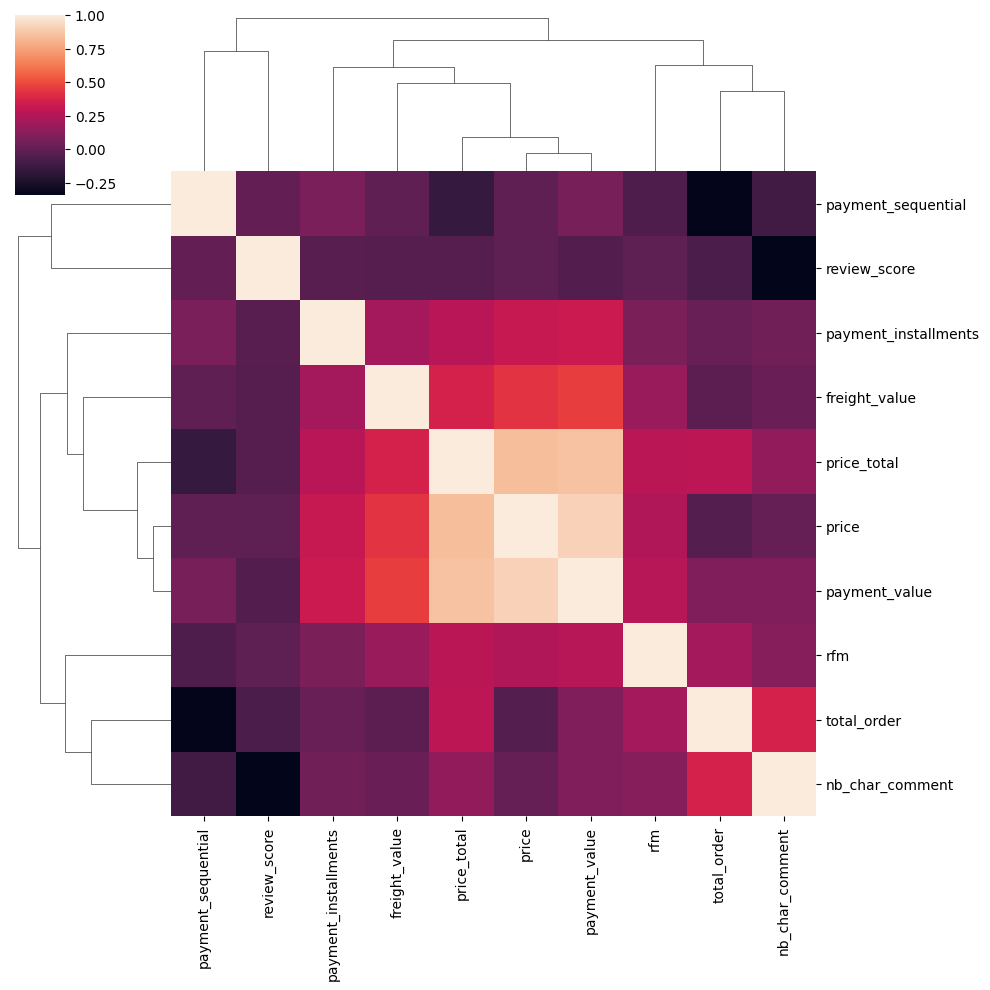

In [86]:
plt.figure()
sns.clustermap(df_cluster.corr())
plt.savefig(f"graphiques/clustermap.png")
plt.show()

/tmp/ipykernel_89793/1317849578.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.barplot(df_cluster.corr())


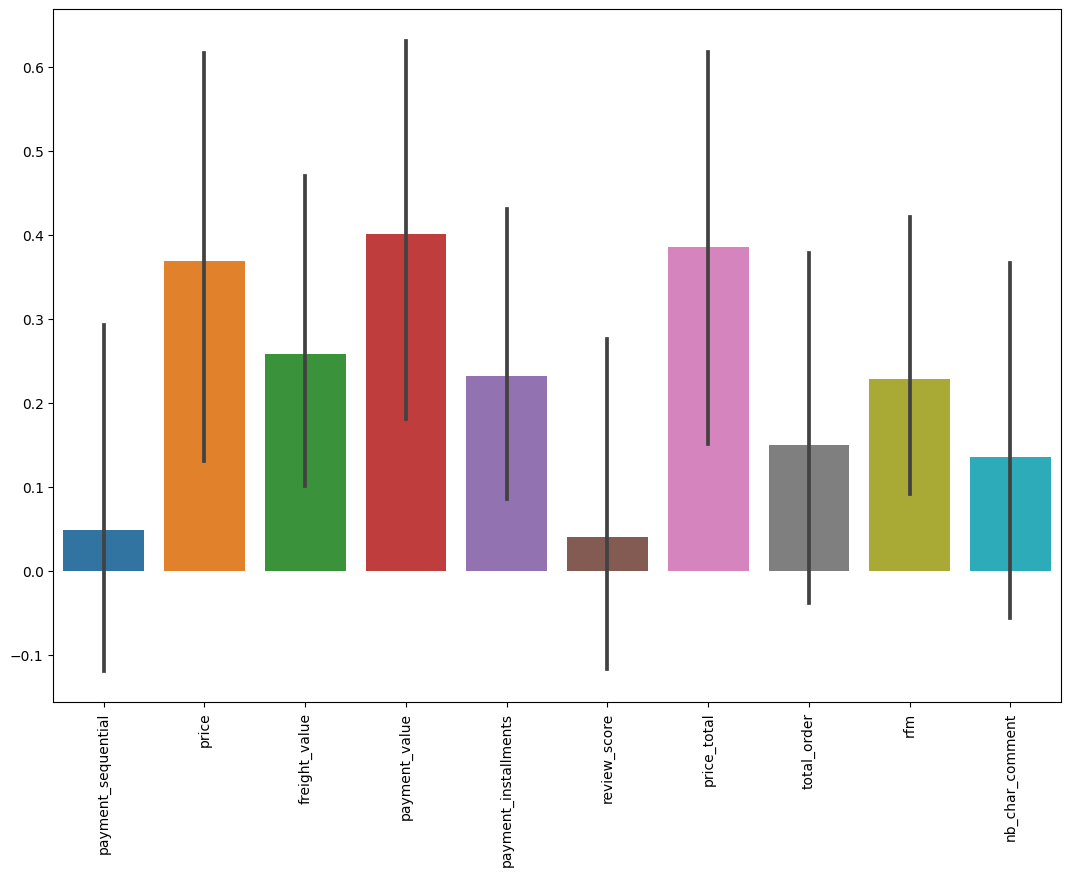

In [87]:
plt.figure(figsize=(13,9))
sns.barplot(df_cluster.corr())
plt.xticks(rotation=90)
plt.savefig(f"graphiques/barplot.png")
plt.show()

### **Clusters**

In [88]:
df_cluster = pd.get_dummies(df_cluster)

df_cluster

,payment_sequential,price,freight_value,payment_value,payment_installments,review_score,price_total,total_order,rfm,nb_char_comment,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,product_category_name_english_Agro_Industry_Commerce,product_category_name_english_Arts_Music,product_category_name_english_Automotive,product_category_name_english_Baby,product_category_name_english_Books,product_category_name_english_Construction_Tools,product_category_name_english_Fashion_Accessories,product_category_name_english_Food_Beverage,product_category_name_english_Furniture,product_category_name_english_Gardening,product_category_name_english_Health_Beauty,product_category_name_english_Home,product_category_name_english_Market_place,product_category_name_english_Office_Supplies,product_category_name_english_Party_Supplies,product_category_name_english_Pet_Supplies,product_category_name_english_Signaling_Security,product_category_name_english_Sports_Leisure,product_category_name_english_Technology,product_category_name_english_Toys_Games
0,1,129.90,12.00,141.90,8.0,5.0,129.90,1.0,16.0,126,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,18.90,8.29,27.19,1.0,4.0,18.90,1.0,13.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,69.00,17.22,86.22,8.0,3.0,69.00,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,25.99,17.63,43.62,4.0,4.0,25.99,1.0,7.0,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,180.00,16.89,196.89,6.0,5.0,180.00,1.0,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93389,1,785.00,248.71,2067.42,10.0,5.0,1570.00,2.0,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
93390,1,64.89,19.69,84.58,1.0,4.0,64.89,1.0,10.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93391,1,89.90,22.56,112.46,1.0,5.0,89.90,1.0,2.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
93392,1,115.00,18.69,133.69,5.0,5.0,115.00,1.0,15.0,141,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
model = KMeans(n_clusters=8)
model.fit(df_cluster)
model.predict(df_cluster)

/home/apprenant/Documents/Programmation/olist_ML/env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 2, ..., 2, 0, 2], dtype=int32)

In [101]:
df_cluster['cluster'] = pd.DataFrame(model.labels_)

In [102]:
df_cluster['cluster'].value_counts()

2    53441
0    28176
6     8048
4     2636
7      809
1      250
5       19
3       15
Name: cluster, dtype: int64

In [103]:
df_cluster

,payment_sequential,price,freight_value,payment_value,payment_installments,review_score,price_total,total_order,rfm,nb_char_comment,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,product_category_name_english_Agro_Industry_Commerce,product_category_name_english_Arts_Music,product_category_name_english_Automotive,product_category_name_english_Baby,product_category_name_english_Books,product_category_name_english_Construction_Tools,product_category_name_english_Fashion_Accessories,product_category_name_english_Food_Beverage,product_category_name_english_Furniture,product_category_name_english_Gardening,product_category_name_english_Health_Beauty,product_category_name_english_Home,product_category_name_english_Market_place,product_category_name_english_Office_Supplies,product_category_name_english_Party_Supplies,product_category_name_english_Pet_Supplies,product_category_name_english_Signaling_Security,product_category_name_english_Sports_Leisure,product_category_name_english_Technology,product_category_name_english_Toys_Games,cluster
0,1,129.90,12.00,141.90,8.0,5.0,129.90,1.0,16.0,126,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,18.90,8.29,27.19,1.0,4.0,18.90,1.0,13.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
2,1,69.00,17.22,86.22,8.0,3.0,69.00,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
3,1,25.99,17.63,43.62,4.0,4.0,25.99,1.0,7.0,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2
4,1,180.00,16.89,196.89,6.0,5.0,180.00,1.0,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93389,1,785.00,248.71,2067.42,10.0,5.0,1570.00,2.0,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7
93390,1,64.89,19.69,84.58,1.0,4.0,64.89,1.0,10.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
93391,1,89.90,22.56,112.46,1.0,5.0,89.90,1.0,2.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
93392,1,115.00,18.69,133.69,5.0,5.0,115.00,1.0,15.0,141,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


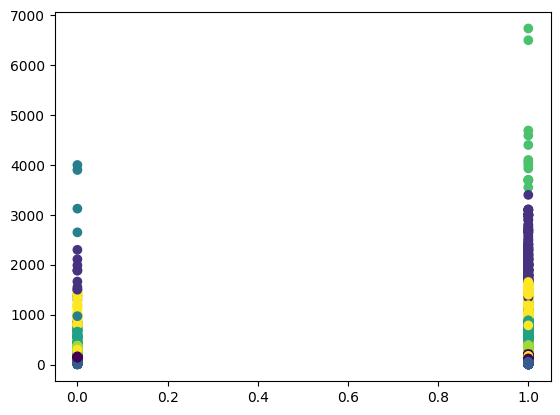

In [104]:
plt.scatter(df_cluster.iloc[:,0], df_cluster.iloc[:,1], c=model.predict(df_cluster))